In [309]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization

from sklearn.datasets import make_regression
from sklearn.pipeline import make_pipeline


from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression,RidgeCV

from sklearn.linear_model import LassoCV, RidgeCV,ElasticNetCV

from sklearn.model_selection import (cross_val_score, train_test_split, KFold, GridSearchCV)

In [310]:
df = pd.read_csv('Players.csv')

In [311]:
df.rename(columns={'Unnamed: 0':'Players Name'},inplace=True)

In [312]:
df

Players Name  Over_All  ball_skills   physical  defence  \
0                  Lionel Messi        93         96.0  80.857143     27.5   
1            Robert Lewandowski        92         86.5  80.285714     38.5   
2                 Kylian Mbappé        91         92.0  87.428571     30.0   
3                     Jan Oblak        91         21.0  59.428571     19.5   
4               Kevin De Bruyne        91         89.5  76.428571     66.5   
...                         ...       ...          ...        ...      ...   
1195  André-Franck González Rey        76         81.0  78.285714     74.5   
1196              Lucas Tousart        76         65.5  69.714286     77.5   
1197          Frédéric Guilbert        76         68.5  74.714286     74.0   
1198         Jeremiah St. Juste        76         74.0  79.285714     78.5   
1199           Gonzalo Martínez        76         81.5  77.142857     37.5   

        GK     mental  shooting    passing  hight  wight  age        value  
0     10.8  77.000000    86.875  89.000000    170     72   34   78000000.0  
1     10.2  81.166667    88.125  75.333333    185     81   33  119500000.0  
2      8.4  75.833333    80.500  78.000000    182     73   22  194000000.0  
3     87.4  47.500000    18.500  32.000000    188     87   28  112000000.0  
4     11.2  84.000000    81.500  93.666667    181     70   30  125500000.0  
...    ...        ...       ...        ...    ...    ...  ...          ...  
1195  10.0  77.000000    61.125  69.666667    184     78   25   10500000.0  
1196  13.4  69.166667    53.875  68.666667    185     83   24   10500000.0  
1197  11.6  70.166667    50.625  70.333333    178     78   26    9000000.0  
1198  11.8  69.833333    53.375  70.000000    184     74   24    9500000.0  
1199  11.0  63.000000    69.625  72.000000    172     75   28    7500000.0  

[1200 rows x 13 columns]

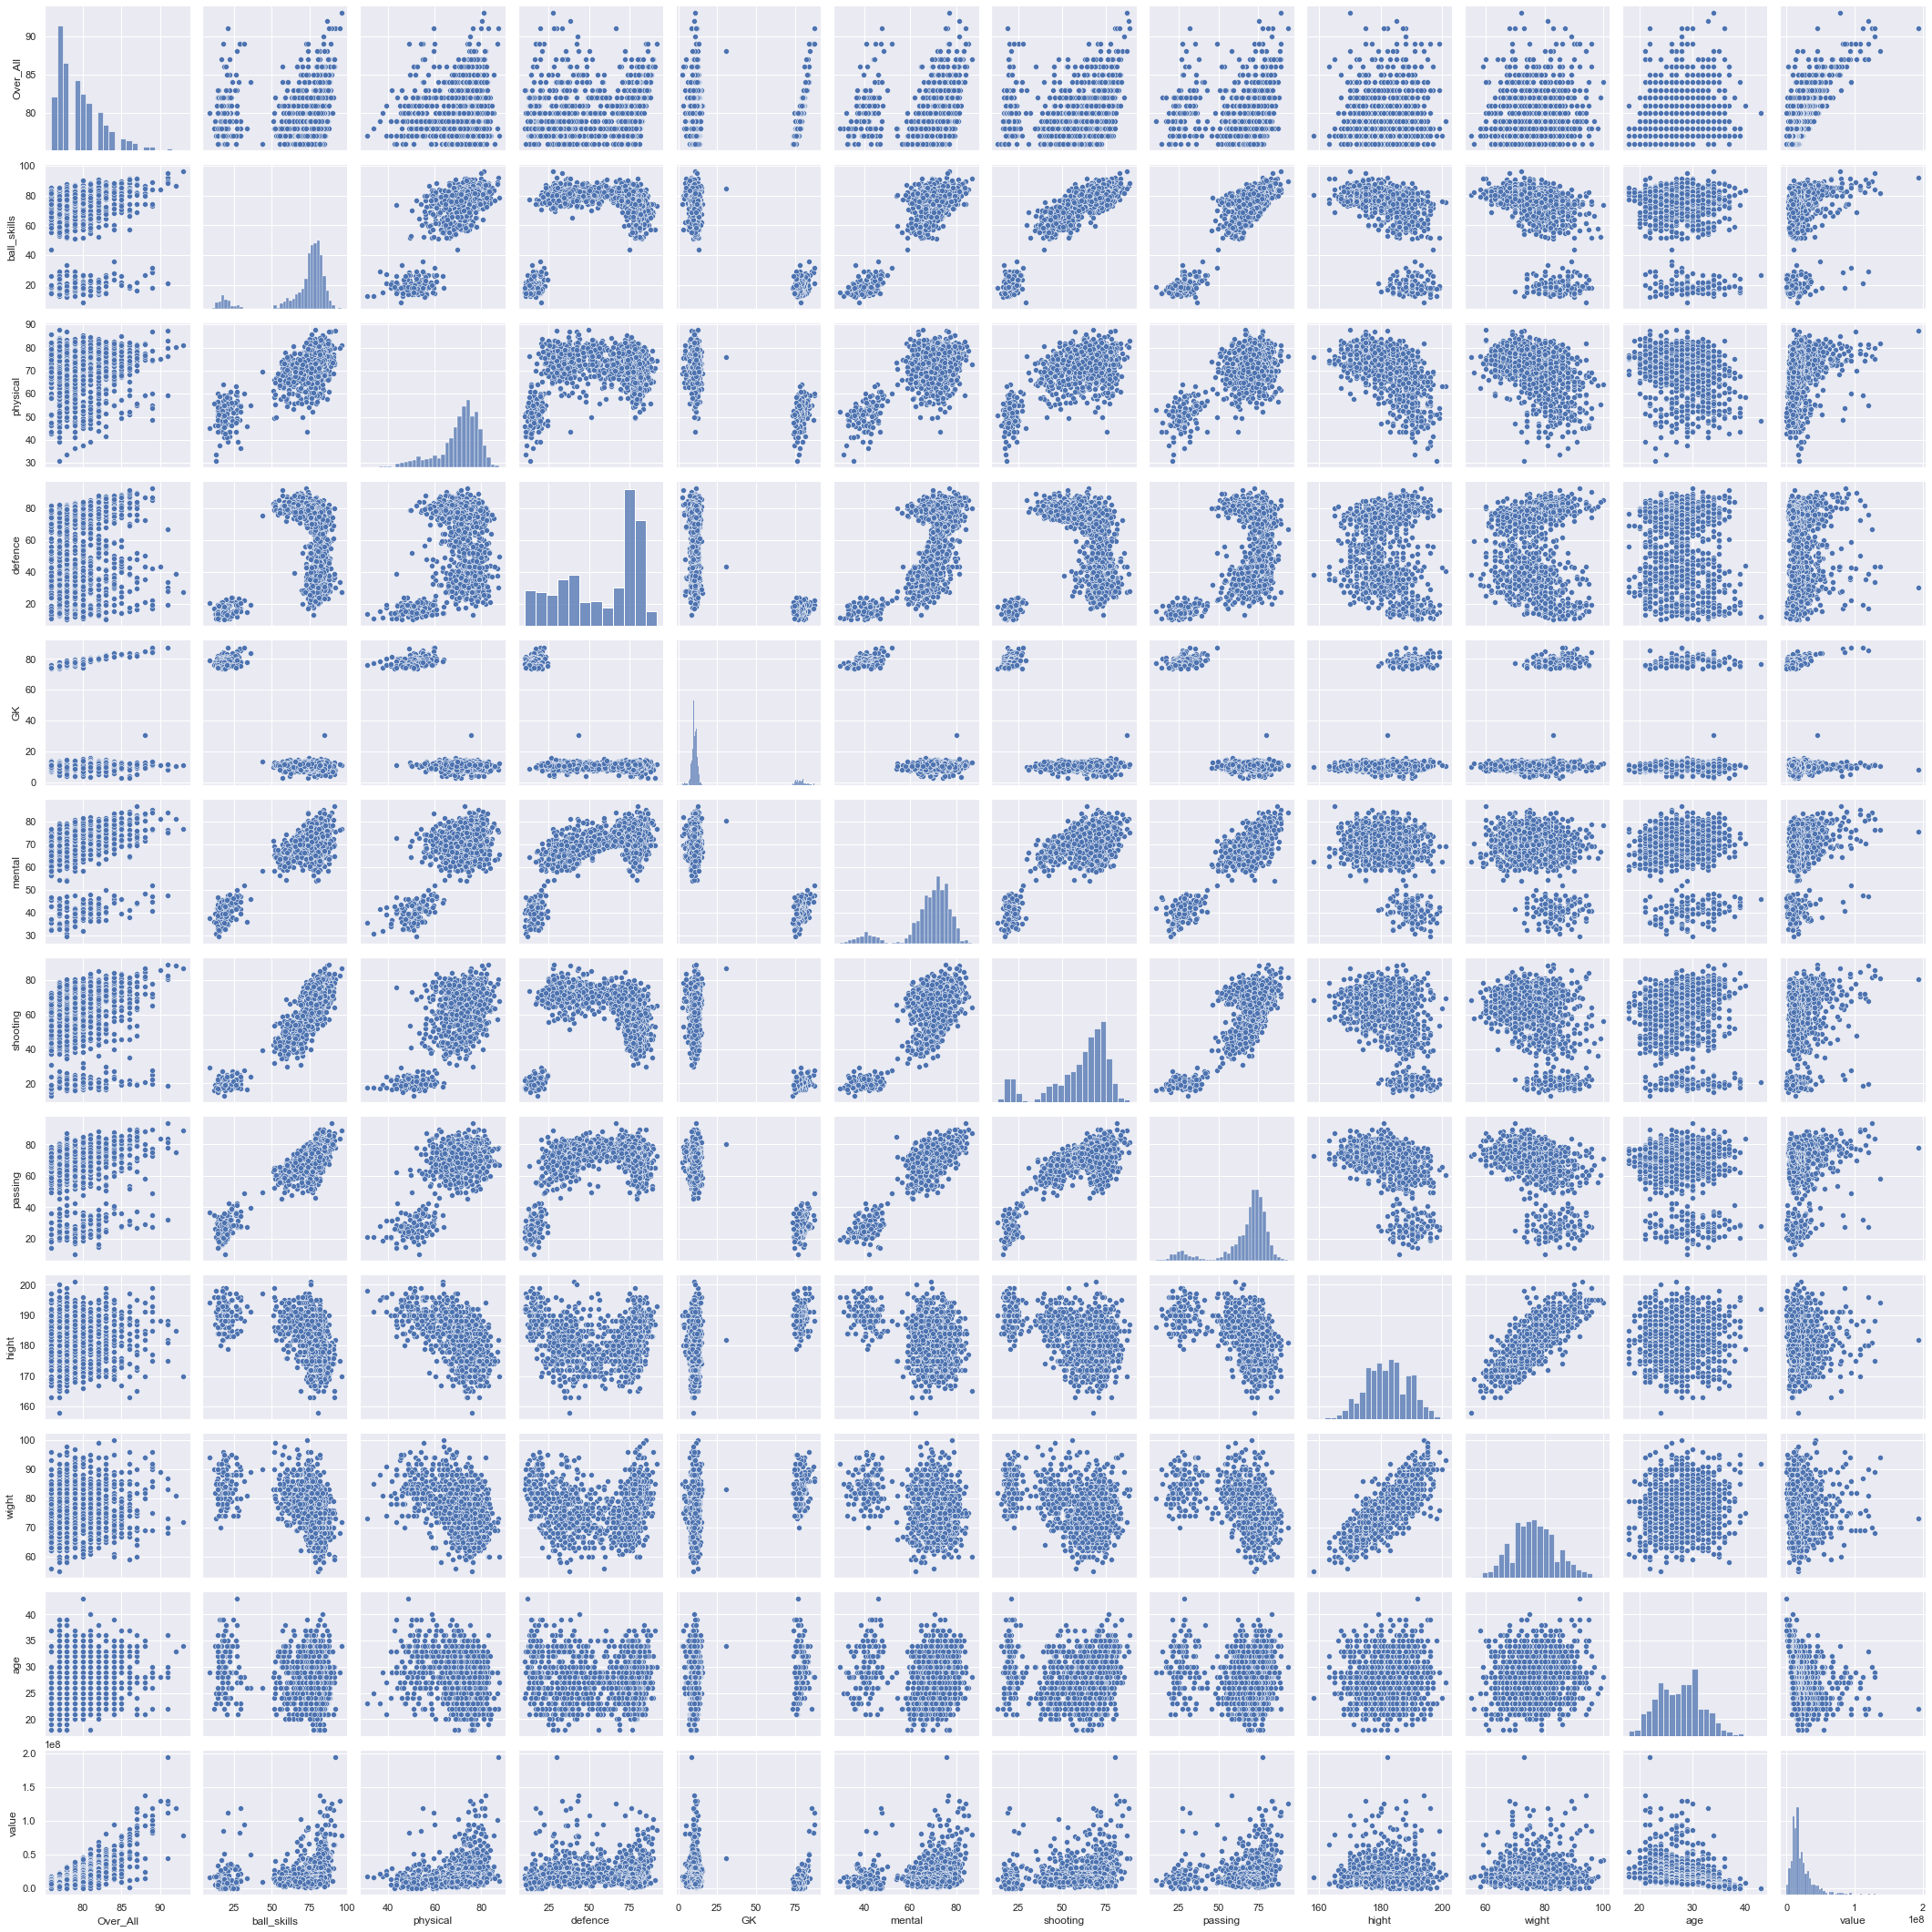

In [313]:
sns.pairplot(df)

# PART 1 - CLEANING THE DATA & CORRELATION.


WE CLEANED OUR DATA.


In [314]:


df['value'] = np.log(df['value'])

v= df["value"].mean()

df = df.fillna(value=v)

mask_df = df[ (df['ball_skills'] > 65)]

mask_df.set_index('Players Name')

Over_All  ball_skills   physical  defence    GK  \
Players Name                                                                 
Lionel Messi                     93         96.0  80.857143     27.5  10.8   
Robert Lewandowski               92         86.5  80.285714     38.5  10.2   
Kylian Mbappé                    91         92.0  87.428571     30.0   8.4   
Kevin De Bruyne                  91         89.5  76.428571     66.5  11.2   
Neymar Jr                        91         95.0  80.000000     33.5  11.8   
...                             ...          ...        ...      ...   ...   
André-Franck González Rey        76         81.0  78.285714     74.5  10.0   
Lucas Tousart                    76         65.5  69.714286     77.5  13.4   
Frédéric Guilbert                76         68.5  74.714286     74.0  11.6   
Jeremiah St. Juste               76         74.0  79.285714     78.5  11.8   
Gonzalo Martínez                 76         81.5  77.142857     37.5  11.0   

                              mental  shooting    passing  hight  wight  age  \
Players Name                                                                   
Lionel Messi               77.000000    86.875  89.000000    170     72   34   
Robert Lewandowski         81.166667    88.125  75.333333    185     81   33   
Kylian Mbappé              75.833333    80.500  78.000000    182     73   22   
Kevin De Bruyne            84.000000    81.500  93.666667    181     70   30   
Neymar Jr                  76.333333    82.625  84.000000    175     68   29   
...                              ...       ...        ...    ...    ...  ...   
André-Franck González Rey  77.000000    61.125  69.666667    184     78   25   
Lucas Tousart              69.166667    53.875  68.666667    185     83   24   
Frédéric Guilbert          70.166667    50.625  70.333333    178     78   26   
Jeremiah St. Juste         69.833333    53.375  70.000000    184     74   24   
Gonzalo Martínez           63.000000    69.625  72.000000    172     75   28   

                               value  
Players Name                          
Lionel Messi               18.172219  
Robert Lewandowski         18.598827  
Kylian Mbappé              19.083369  
Kevin De Bruyne            18.647816  
Neymar Jr                  18.675323  
...                              ...  
André-Franck González Rey  16.166886  
Lucas Tousart              16.166886  
Frédéric Guilbert          16.012735  
Jeremiah St. Juste         16.066802  
Gonzalo Martínez           15.830414  

[968 rows x 12 columns]

- FIND OUT OUR CORRELATED FEATURES.

In [315]:
mask_df.corr()

Over_All  ball_skills  physical   defence        GK    mental  \
Over_All     1.000000     0.413607  0.207221  0.081816  0.032243  0.505420   
ball_skills  0.413607     1.000000  0.271270 -0.407796 -0.013634  0.139462   
physical     0.207221     0.271270  1.000000 -0.151131 -0.026078  0.009345   
defence      0.081816    -0.407796 -0.151131  1.000000 -0.005157  0.625889   
GK           0.032243    -0.013634 -0.026078 -0.005157  1.000000  0.052270   
mental       0.505420     0.139462  0.009345  0.625889  0.052270  1.000000   
shooting     0.323939     0.612891  0.118738 -0.516585  0.052061  0.136481   
passing      0.378480     0.496529  0.023149  0.273007  0.042493  0.526557   
hight        0.045126    -0.358590 -0.351486  0.112764  0.007159  0.028413   
wight        0.093409    -0.341798 -0.235539  0.091598 -0.005826  0.048769   
age          0.192151    -0.022521 -0.267404  0.036168  0.093164  0.259581   
value        0.783179     0.425027  0.352479 -0.002835 -0.010948  0.288925   

             shooting   passing     hight     wight       age     value  
Over_All     0.323939  0.378480  0.045126  0.093409  0.192151  0.783179  
ball_skills  0.612891  0.496529 -0.358590 -0.341798 -0.022521  0.425027  
physical     0.118738  0.023149 -0.351486 -0.235539 -0.267404  0.352479  
defence     -0.516585  0.273007  0.112764  0.091598  0.036168 -0.002835  
GK           0.052061  0.042493  0.007159 -0.005826  0.093164 -0.010948  
mental       0.136481  0.526557  0.028413  0.048769  0.259581  0.288925  
shooting     1.000000  0.294459 -0.094604 -0.044501  0.292002  0.170751  
passing      0.294459  1.000000 -0.307676 -0.293049  0.159306  0.237594  
hight       -0.094604 -0.307676  1.000000  0.767253  0.009927  0.048037  
wight       -0.044501 -0.293049  0.767253  1.000000  0.117752  0.023843  
age          0.292002  0.159306  0.009927  0.117752  1.000000 -0.403679  
value        0.170751  0.237594  0.048037  0.023843 -0.403679  1.000000

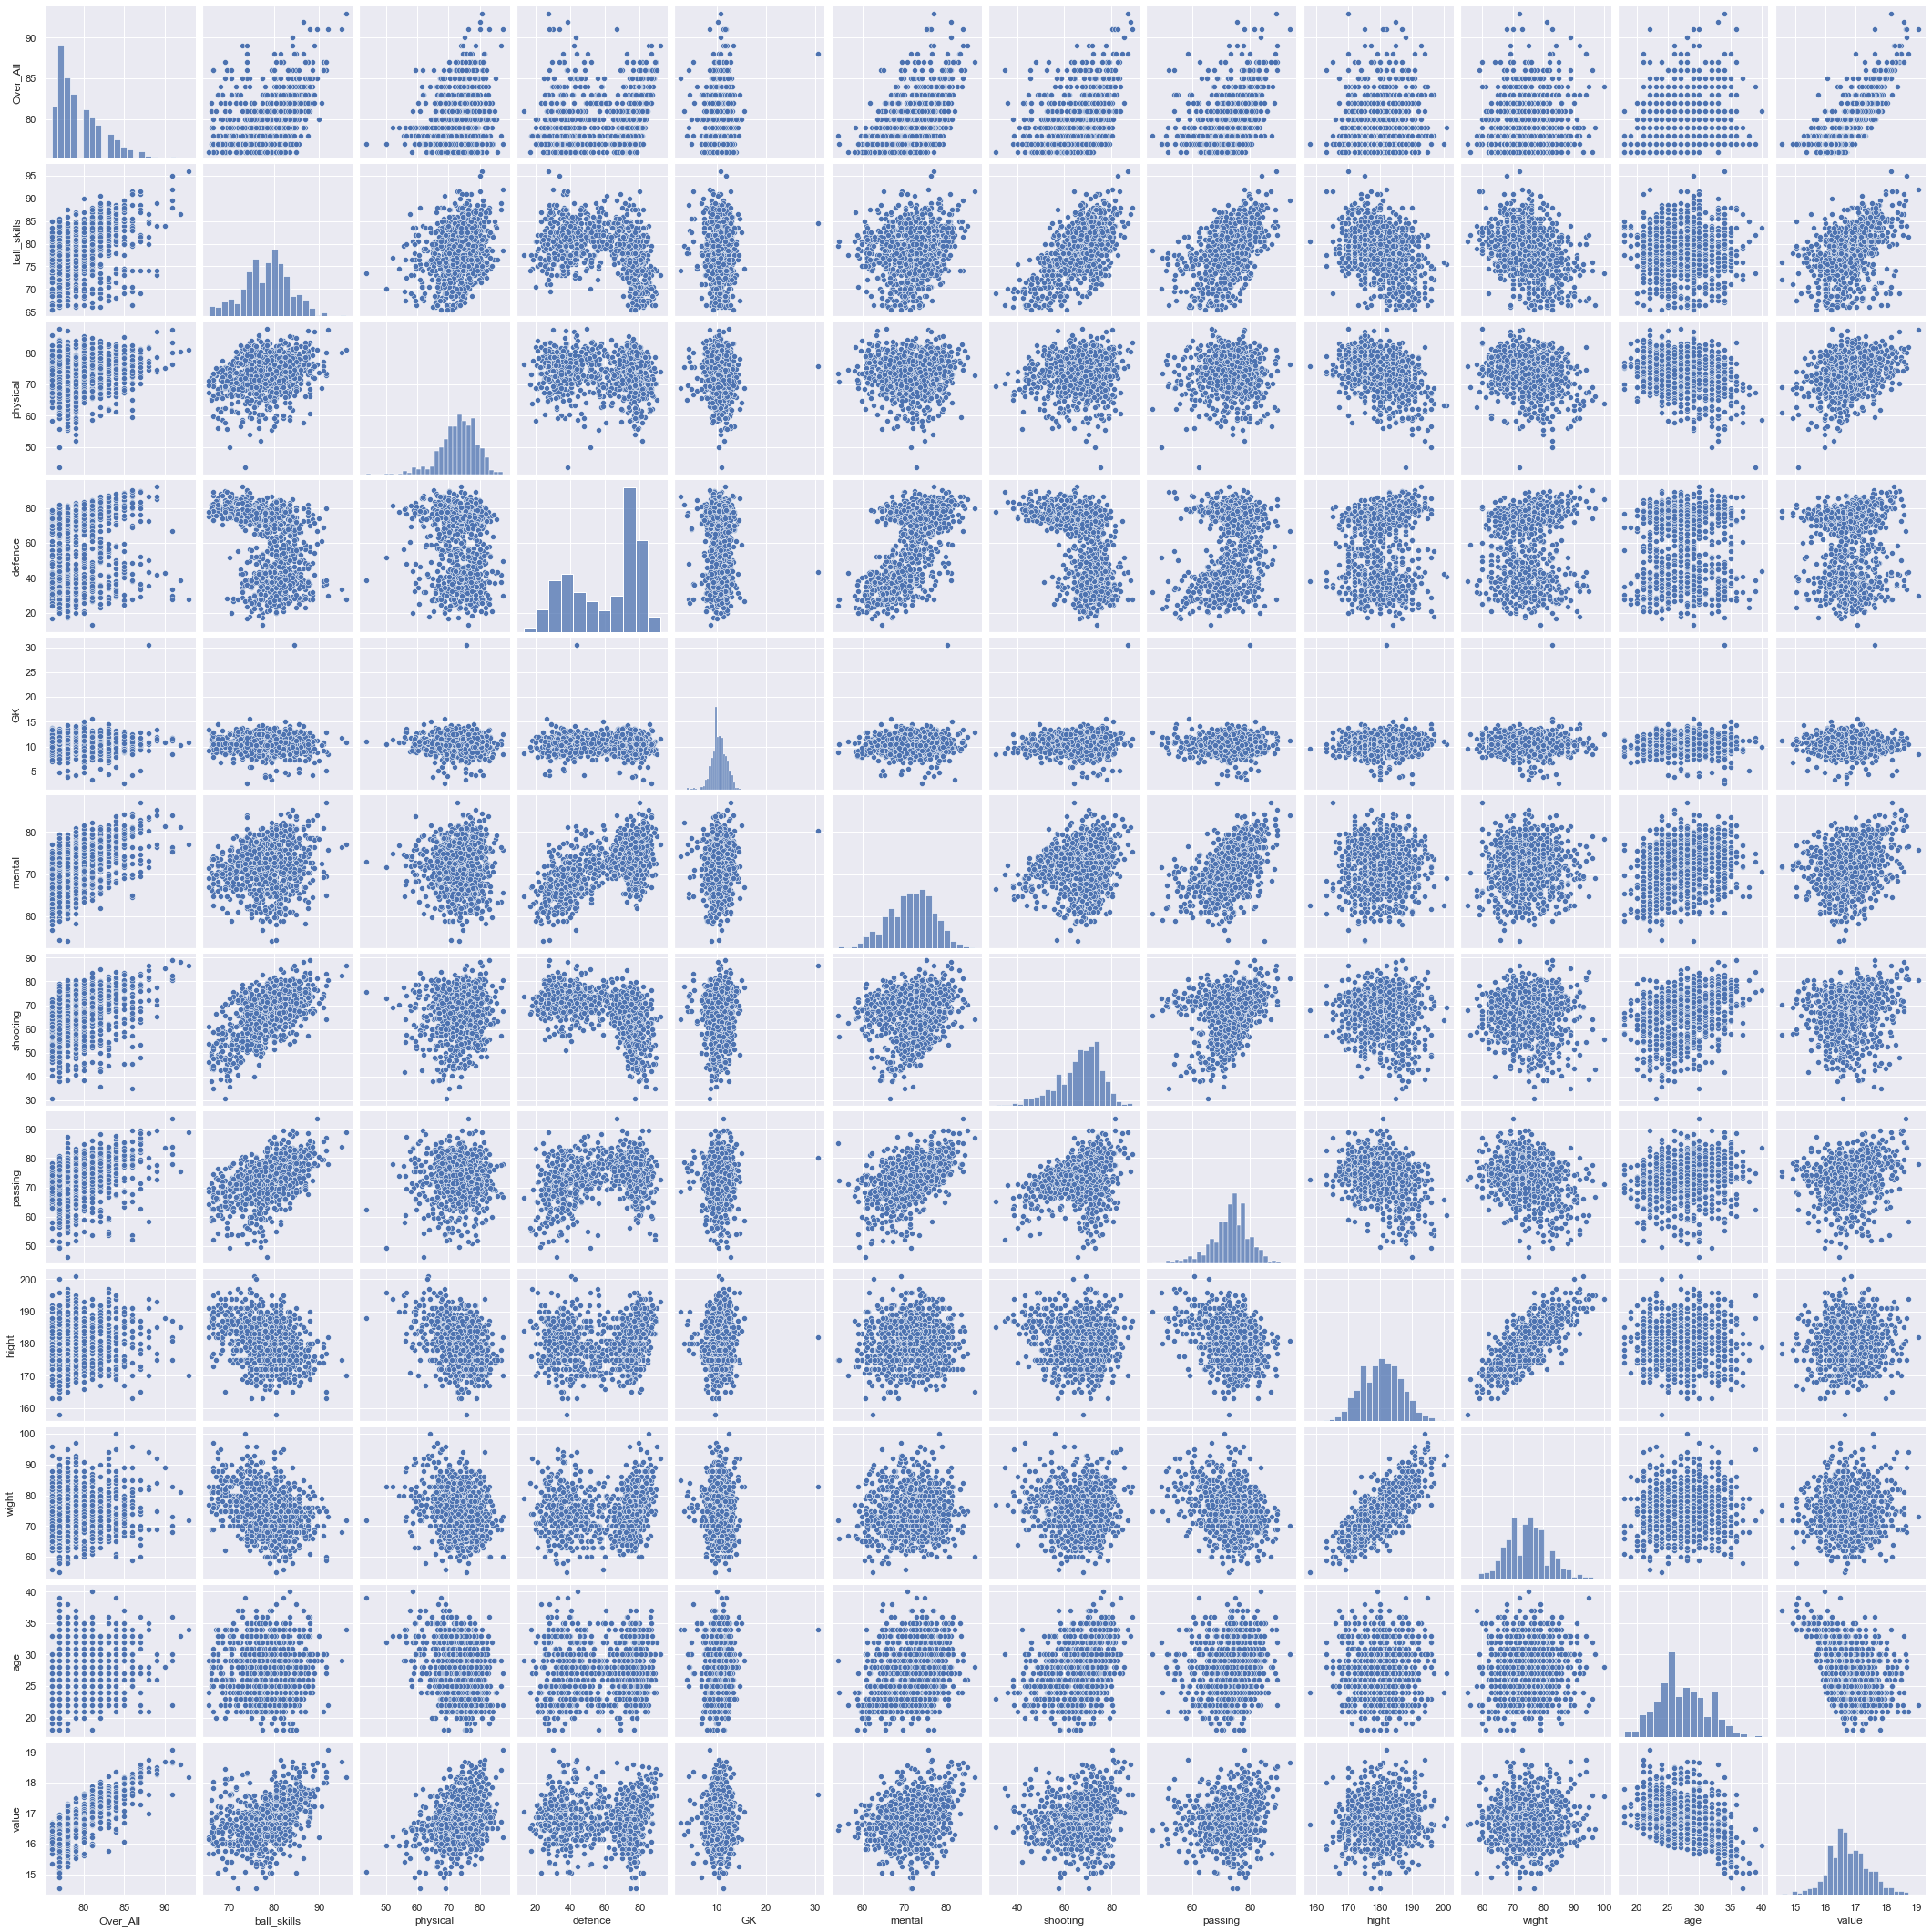

In [316]:
sns.pairplot(mask_df)

- DROPPING OUT THE MULTICOLLINEAR FEATURES.

In [317]:
df.drop(['Over_All', 'hight','wight'], axis=1, inplace=True)

- here we applied LinearRegression

MAE : Mean Absoulte Error 

In [318]:
def MAE(actuals, preds): #mean absolute error
    return np.mean(np.abs(actuals-preds))

In [319]:
# Split into train, val, and test
X_train, X_test, y_train, y_test = train_test_split(mask_df[['ball_skills','physical','defence','GK','mental','shooting','passing','age']], mask_df['value'], test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=40)



In [320]:
# Fit a simple linear regression on training set
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.49242702344936884

In [321]:
lr.score(X_val,y_val)

0.36349019617636225

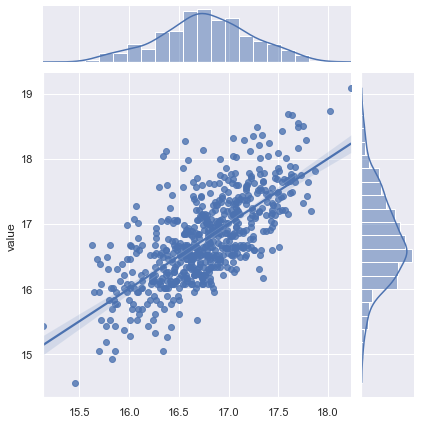

In [322]:
preds_lr = lr.predict(X_train) # generate predictions (on training data) using fit model

sns.jointplot(x=preds_lr,y=y_train, kind='reg')

In [323]:
MAE(y_train,preds_lr)

0.37610887591462994

In [324]:
print(lr.intercept_)
print(lr.coef_)

11.540572194977544
[ 0.02964753  0.01465189 -0.00467913  0.00444636  0.06109154  0.00482088
 -0.00540848 -0.08255125]


- WOW !! VERY BAD COFF.

- APLLYING OLS AND SEE THE SUMMARY.

In [325]:
Y, X = patsy.dmatrices('value ~ball_skills+physical+defence+GK+mental+shooting+passing+age', data=mask_df, return_type="dataframe")

# Create your model
model = sm.OLS(Y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     113.1
Date:                Sun, 31 Oct 2021   Prob (F-statistic):          8.99e-133
Time:                        00:17:50   Log-Likelihood:                -668.88
No. Observations:                 968   AIC:                             1356.
Df Residuals:                     959   BIC:                             1400.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.2645      0.372     30.305      0.000      10.535      11.994
ball_skills     0.0347      0.005      6.756      0.000       0.025       0.045
physical        0.0146      0.003      4.905      0.000       0.009       0.021
defence        -0.0056      0.002     -2.924      0.004      -0.009      -0.002
GK              0.0062      0.009      0.687      0.492      -0.011       0.024
mental          0.0627      0.006     11.228      0.000       0.052       0.074
shooting       -0.0009      0.003     -0.293      0.769      -0.007       0.005
passing        -0.0039      0.004     -1.078      0.281      -0.011       0.003
age            -0.0799      0.005    -17.594      0.000      -0.089      -0.071
==============================================================================
Omnibus:                       61.667   Durbin-Watson:                   0.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.385
Skew:                           0.580   Prob(JB):                     1.57e-17
Kurtosis:                       3.756   Cond. No.                     4.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 - Since we found our R**2 = 0.485, and from the pairplot we found that we can apply polynomial regg to linearise our model. 

-  IN y2 = target variable , and IN X2 WE SAPERATED OUR TARGET VARIABAL  FROM OUR DATAFRAME.

In [326]:
y2 = mask_df['value']
X2 = mask_df.drop(['value','Players Name'],axis=1)

In [327]:

def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)

    plt.subplot(1, 3, 1)
    plt.scatter(pred,y,alpha=0.1)
    plt.plot(y, y, color='red',linewidth=1,)
    plt.title("Regression fit")
    plt.xlabel("Predicted y")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res,alpha=0.1)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    print(res)    
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt,)
    plt.title("Normal Q-Q plot")

0      -0.694956
1      -0.188496
2      -0.566366
4      -0.167750
5      -0.291347
          ...   
1195   -0.170322
1196   -0.150193
1197   -0.107190
1198   -0.298977
1199   -0.191036
Name: value, Length: 968, dtype: float64


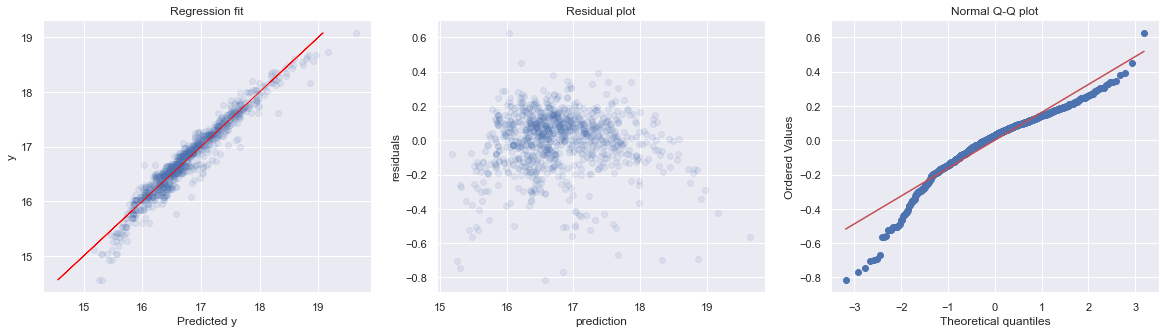

In [328]:
sns.set(style='darkgrid')
diagnostic_plot(X2, y2)

as we see in theoretical quantiles plot , it follows normal distrubation pattren 

- we will take train sample from X which is our feature , and y which is our target value . 
*size of our sample is 20% from our data 

In [329]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)

X_test_poly=poly.transform(X_test)

In [330]:
train_score=[]
valid_score=[]
test_score=[]
MAE_=[]

### Exper 1: Ploynomial with Linear 

In [331]:
# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)


predicted_lr_poly = lr_poly.predict(X_test_poly)

print('train Score: ',lr_poly.score(X_train_poly,y_train))
print('validation Score: ',lr_poly.score(X_val_poly,y_val))
print('test Score: ',lr_poly.score(X_test_poly,y_test))
print("Mean absolute Sqaure",MAE(np.exp(y_test),np.exp(predicted_lr_poly)))

train_score.append(lr_poly.score(X_train_poly,y_train))
valid_score.append(lr_poly.score(X_val_poly,y_val))
test_score.append(lr_poly.score(X_test_poly,y_test))
MAE_.append(MAE(np.exp(y_test),np.exp(predicted_lr_poly)))




train Score:  0.7585755411512536
validation Score:  0.674015663358905
test Score:  0.7473012340234659
Mean absolute Sqaure 9499134.697439384


In [332]:
lr_poly.coef_

array([ 2.88278632e-14, -1.29583311e-01, -5.07992253e-02,  1.43483623e-01,
       -4.11974563e-01, -1.81933428e-01,  7.85835175e-02, -3.31243096e-01,
        1.39468492e-01,  1.58248520e-03,  3.18461827e-04, -7.81850792e-04,
        1.08876572e-03, -3.31685509e-03, -5.67721675e-04,  2.83440049e-03,
       -1.43195470e-05,  4.84245763e-04, -7.58160574e-05,  1.42115202e-03,
       -4.00299130e-04,  1.89815827e-04, -3.51475479e-04,  1.51806675e-04,
        6.54590879e-04, -4.62390625e-04, -1.22444441e-03, -6.29625498e-04,
       -2.95434414e-04,  2.68579755e-04,  1.19848648e-03,  5.17940747e-03,
       -2.91479434e-04, -8.47068992e-04, -2.27956719e-03,  3.53352274e-03,
        1.94126221e-04,  2.89950538e-04, -8.82569191e-07,  8.38435369e-04,
       -1.65203607e-03,  2.47830406e-04,  1.77784475e-03,  2.11563651e-04,
       -4.93945174e-03])

# Standraztion 

In [333]:
scaler = StandardScaler()

X_train_poly_scaled = scaler.fit_transform(X_train_poly)

X_val_poly_scaled = scaler.transform(X_val_poly)


X_test_poly_scaled = scaler.fit_transform(X_test_poly)

In [334]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [335]:
params = {"alpha": np.logspace(-4, -.1, 20)}
GS = GridSearchCV(Lasso(), param_grid=params, cv=kf, return_train_score=False)
GS.fit(X_train_poly_scaled, y_train);
GS.fit(X_val_poly_scaled, y_val);
GS.fit(X_test_poly_scaled, y_test);

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.790923752552313, tolerance: 0.02168821346299919
  model = cd_fast.enet_coordinate_descent(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.340155259482902, tolerance: 0.022256029277222214
  model = cd_fast.enet_coordinate_descent(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.811537990716825, tolerance: 0.02207913815507714
  model = cd_fast.enet_coordinate_descent(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packa

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.970405576347666, tolerance: 0.02168821346299919
  model = cd_fast.enet_coordinate_descent(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.201528751248986, tolerance: 0.022256029277222214
  model = cd_fast.enet_coordinate_descent(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7555373038987696, tolerance: 0.02207913815507714
  model = cd_fast.enet_coordinate_descent(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-package

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1956107840987817, tolerance: 0.00430814144070807
  model = cd_fast.enet_coordinate_descent(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2598981426475149, tolerance: 0.004045925875614806
  model = cd_fast.enet_coordinate_descent(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.16998620620065452, tolerance: 0.003727868385380548
  model = cd_fast.enet_coordinate_descent(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-pac

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.022003477725462517, tolerance: 0.008693597246906676
  model = cd_fast.enet_coordinate_descent(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015198688416294459, tolerance: 0.00891424916491771
  model = cd_fast.enet_coordinate_descent(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.899227871777414, tolerance: 0.010772928541864233
  model = cd_fast.enet_coordinate_descent(


### Exper 2: Lasso

In [336]:
lasso = LassoCV(GS.best_estimator_.alpha)
lasso.fit(X_train_poly_scaled,y_train)

predicted_Lasso = lasso.predict(X_test_poly_scaled)




print('train Score: ',lasso.score(X_train_poly_scaled,y_train))
print('validation Score: ',lasso.score(X_val_poly_scaled,y_val))
print('test Score: ',lasso.score(X_test_poly_scaled,y_test))
print("Mean absolute Sqaure",MAE(np.exp(y_test),np.exp(predicted_Lasso)))


train_score.append(lasso.score(X_train_poly_scaled,y_train))
valid_score.append(lasso.score(X_val_poly_scaled,y_val))
test_score.append(lasso.score(X_test_poly_scaled,y_test))
MAE_.append(MAE(np.exp(y_test),np.exp(predicted_Lasso)))





/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass eps=0.000257351270001691 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06824036485555496, tolerance: 0.021755525404576998
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.22634259311402616, tolerance: 0.021755525404576998
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.753964702337804, tolerance: 0.021755525404576998
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11144543897241022, tolerance: 0.02236296188717941
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13638309486075428, tolerance: 0.02236296188717941
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/pyth

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.460937409998877, tolerance: 0.02236296188717941
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4379109538881636, tolerance: 0.02236296188717941
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3991232808152887, tolerance: 0.02236296188717941
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.068646038825946, tolerance: 0.023429062727838082
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2495548972249395, tolerance: 0.023429062727838082
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4059926212438185, tolerance: 0.023429062727838082
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/pyth

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3522473535672503, tolerance: 0.022437105053576666
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8721340116925376, tolerance: 0.022437105053576666
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.5494978255698726, tolerance: 0.022437105053576666
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/pyt

train Score:  0.7453398784647365
validation Score:  0.6868564479875288
test Score:  0.7610583065802408
Mean absolute Sqaure 7890620.893221162


/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0623451135618254, tolerance: 0.021694317181217025
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.232223977188866, tolerance: 0.021694317181217025
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3221223676251057, tolerance: 0.021694317181217025
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/pyth

In [337]:
list(zip(poly.get_feature_names(['ball_skills','physical','defence','GK','mental','shooting','passing','age']),
         lasso.coef_))

[('1', 0.0),
 ('ball_skills', -1.5250238916509053),
 ('physical', -0.06948995878894554),
 ('defence', 0.40026294140232815),
 ('GK', -0.2308350532301413),
 ('mental', -0.39241234281394155),
 ('shooting', -0.11006369714237954),
 ('passing', -0.9432160998522342),
 ('age', 0.3336976229984505),
 ('ball_skills^2', 1.8259844996840167),
 ('ball_skills physical', 0.03578566494354251),
 ('ball_skills defence', -0.6943341012471351),
 ('ball_skills GK', 0.0),
 ('ball_skills mental', -0.32976046067916054),
 ('ball_skills shooting', -0.0),
 ('ball_skills passing', 0.36415443213221504),
 ('ball_skills age', 0.1250489576557725),
 ('physical^2', 0.27733769173786993),
 ('physical defence', -3.1057125500565794e-06),
 ('physical GK', 0.0),
 ('physical mental', -0.05182745425535232),
 ('physical shooting', 0.004823852287768929),
 ('physical passing', -0.1604467410062309),
 ('physical age', 0.0),
 ('defence^2', 1.269297018898897),
 ('defence GK', -0.0),
 ('defence mental', 0.036127965934183014),
 ('defence 

### Exper 3: Ridge

In [338]:
ridge = RidgeCV(GS.best_estimator_.alpha)
ridge.fit(X_train_poly_scaled,y_train)

predicted_Ridge = ridge.predict(X_test_poly_scaled)




print('train score: ',ridge.score(X_train_poly_scaled,y_train))
print('Valid score: ',ridge.score(X_val_poly_scaled,y_val))
print('test score: ',ridge.score(X_test_poly_scaled,y_test))
print('Mean abs Sqr : ',MAE(np.exp(y_test),np.exp(predicted_Ridge)))



train_score.append(ridge.score(X_train_poly_scaled,y_train))
valid_score.append(ridge.score(X_val_poly_scaled,y_val))
test_score.append(ridge.score(X_test_poly_scaled,y_test))
MAE_.append(MAE(np.exp(y_test),np.exp(predicted_Ridge)))




train score:  0.7585754191537156
Valid score:  0.6741071728332253
test score:  0.739337885527068
Mean abs Sqr :  8846310.566595763


In [339]:
list(zip(poly.get_feature_names(['ball_skills','physical','defence','GK'
                                 ,'mental','shooting','passing','age']),ridge.coef_))



[('1', 0.0),
 ('ball_skills', -0.6755883811719627),
 ('physical', -0.29293246507756976),
 ('defence', 2.8243006077988184),
 ('GK', -0.6579659250116663),
 ('mental', -0.9691510795596514),
 ('shooting', 0.6961788022056226),
 ('passing', -2.2206375481873692),
 ('age', 0.5645894191645766),
 ('ball_skills^2', 1.285218545033672),
 ('ball_skills physical', 0.2090097464582641),
 ('ball_skills defence', -1.1324536792036497),
 ('ball_skills GK', 0.14691362859156243),
 ('ball_skills mental', -1.9785668414988322),
 ('ball_skills shooting', -0.5299377637160916),
 ('ball_skills passing', 2.2007206672794553),
 ('ball_skills age', -0.005786107693722897),
 ('physical^2', 0.3994281135857136),
 ('physical defence', -0.10916604363717397),
 ('physical GK', 0.18534284181565397),
 ('physical mental', -0.2324694706161381),
 ('physical shooting', 0.1518402779501571),
 ('physical passing', -0.22620679284915468),
 ('physical age', 0.045587735496724235),
 ('defence^2', 1.4421753938586335),
 ('defence GK', -0.1067

### Exper 3: Elastic

In [340]:
elastic = ElasticNetCV(GS.best_estimator_.alpha)
elastic.fit(X_train_poly_scaled,y_train)
print('Train Score :',elastic.score(X_train_poly_scaled,y_train))
print('valid Score :',elastic.score(X_val_poly_scaled,y_val))
print('test Score :',elastic.score(X_test_poly_scaled,y_test))









Train Score : 0.47643120427587615
valid Score : 0.3963273766539277
test Score : 0.47504747123254454


/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass l1_ratio=0.000257351270001691 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [341]:


list(zip(poly.get_feature_names(['ball_skills','physical','defence','GK','mental','shooting','passing','age'])
         ,elastic.coef_))


[('1', 0.0),
 ('ball_skills', 0.029022254360441195),
 ('physical', 0.019246483879780254),
 ('defence', -0.0),
 ('GK', -0.0014960142190418282),
 ('mental', 0.04083276918333513),
 ('shooting', 0.008755650375260842),
 ('passing', -0.003647799498271688),
 ('age', -0.04722310048902478),
 ('ball_skills^2', 0.03527993447041735),
 ('ball_skills physical', 0.0348184985779976),
 ('ball_skills defence', -0.0009153008372267897),
 ('ball_skills GK', 0.008987743588895092),
 ('ball_skills mental', 0.04826047675980809),
 ('ball_skills shooting', 0.025437991416912012),
 ('ball_skills passing', 0.01714916024391104),
 ('ball_skills age', -0.029779524249633583),
 ('physical^2', 0.020814465410244485),
 ('physical defence', 1.2834756735805659e-05),
 ('physical GK', 0.0062682923126650926),
 ('physical mental', 0.042957384734720994),
 ('physical shooting', 0.021559344301360136),
 ('physical passing', 0.013363380406442986),
 ('physical age', -0.03418373424590014),
 ('defence^2', 0.016330090378516182),
 ('defen

In [342]:
def diagnostic_plot2(x_train, y_train, x_test, y_test):
    plt.figure(figsize=(22,8))
    
  
    
    rgr = LinearRegression()
    rgr.fit(x_train,y_train)
    pred = rgr.predict(x_test)    

    plt.subplot(1, 2, 1)
    plt.scatter(pred,y_test,alpha=0.1)
    plt.plot(y_test, y_test, color='red',linewidth=1,label='Identity Line (Log Market Value)')
    plt.title("Regression Fit on Test Set",weight='bold')
    plt.xlabel("Log Predicted Market Value")
    plt.ylabel("Log Market Value")
    plt.legend(loc='lower right')
    sns.despine()
    
    plt.subplot(1, 2, 2)
    res = np.array(y_test).reshape(-1,1) - pred
    plt.scatter(pred, res,alpha=0.1)
    plt.title("Residual Plot on Test Set",weight='bold')
    plt.xlabel("Log Predicted Market Value")
    plt.ylabel("Residuals")
    sns.despine()

847    0.000222
885   -0.214994
696    0.050299
757    0.005824
815   -0.120242
         ...   
845   -0.533630
994   -0.024669
66     0.150872
303    0.486301
823    0.141843
Name: value, Length: 155, dtype: float64


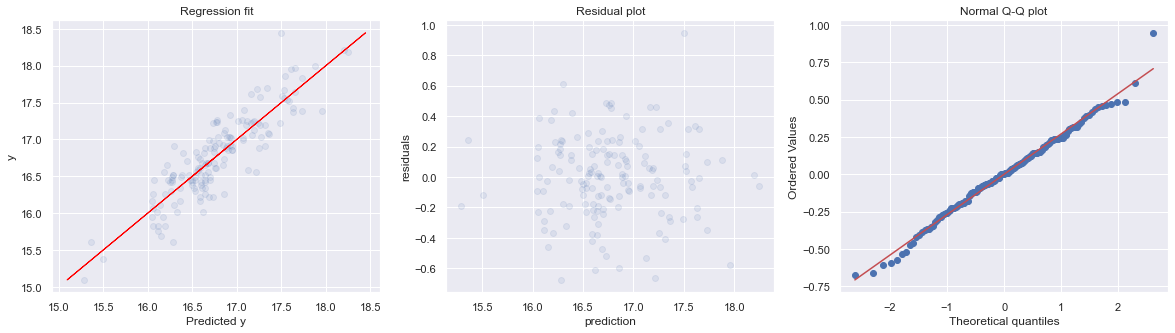

In [343]:
sns.set(style='darkgrid')
diagnostic_plot(X_val_poly_scaled, y_val)

1182   -0.208392
712     0.125877
574     0.144207
583     0.632787
968    -0.687219
          ...   
950     0.014520
517    -0.879028
132    -0.072441
4       0.654590
616     0.608469
Name: value, Length: 194, dtype: float64


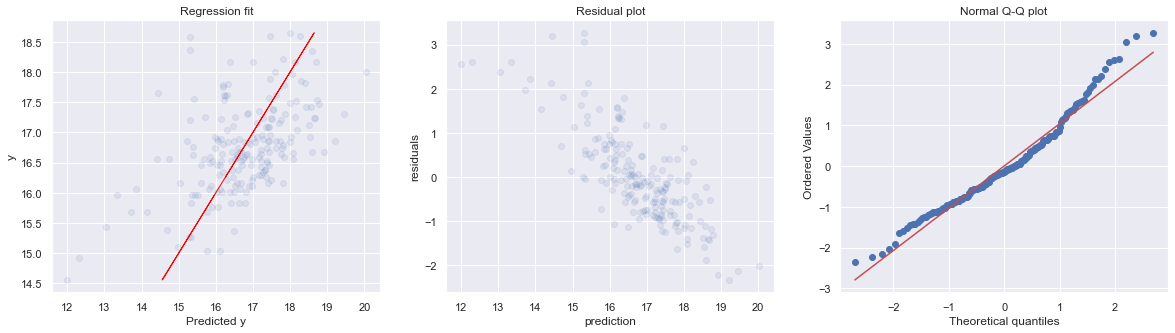

In [344]:
sns.set(style='darkgrid')
diagnostic_plot(X_test_poly_scaled, y_test)

In [345]:
models=[ 'lm_poly','lasso','ridge']


df = pd.DataFrame(columns=['train_score', 'valid_score','test_score', 'MAE_'], index= models)


train_score valid_score test_score MAE_
lm_poly         NaN         NaN        NaN  NaN
lasso           NaN         NaN        NaN  NaN
ridge           NaN         NaN        NaN  NaN

In [346]:
df['train_score'] = train_score
df['valid_score'] = valid_score
df['test_score'] = test_score
df['MAE_'] = MAE_


In [351]:
df

train_score  valid_score  test_score          MAE_
lm_poly     0.758576     0.674016    0.747301  9.499135e+06
lasso       0.745340     0.686856    0.761058  7.890621e+06
ridge       0.758575     0.674107    0.739338  8.846311e+06

as we see Lasso is the best model in our project 

# Final Prediction 

##### we choose Lasso Model 

In [347]:
Test_Set = pd.DataFrame(y_test).join(X_test).join(pd.DataFrame(mask_df['Players Name']))
Test_Set['Log Market Value'] = np.exp(Test_Set['value'] )
Test_Set = Test_Set.rename(columns={'value':'Market Value'})
Test_Set['Predicted Market Value'] = np.exp(predicted_Lasso)
Test_Set = Test_Set.sort_values(by='Predicted Market Value',ascending=False)

Test_Set['Real Value'] = np.exp(Test_Set['Market Value'])



Test_Set = Test_Set[['Players Name','Market Value','Real Value','Predicted Market Value','age','defence','passing','physical','shooting','GK']]
Test_Set.reset_index(inplace=True)
Test_Set.drop('index',axis=1,inplace=True)
Test_Set

Players Name  Market Value   Real Value  Predicted Market Value  age  \
0        Lionel Messi     18.172219   78000000.0            2.492308e+08   34   
1     Kevin De Bruyne     18.647816  125500000.0            1.013084e+08   30   
2     Frenkie de Jong     18.598827  119500000.0            8.516533e+07   24   
3        Jadon Sancho     18.573402  116500000.0            7.610196e+07   21   
4       Memphis Depay     17.958645   63000000.0            7.251661e+07   27   
..                ...           ...          ...                     ...  ...   
189              Oier     14.914123    3000000.0            5.130907e+06   35   
190           Soldado     15.096444    3600000.0            4.752824e+06   36   
191    Wagner Laranjo     14.557448    2100000.0            3.943454e+06   37   
192  Mathieu Valbuena     15.039286    3400000.0            3.490144e+06   37   
193     Rubem Esteiro     15.363073    4700000.0            3.460499e+06   33   

     defence    passing   physical  shooting    GK  
0       27.5  89.000000  80.857143    86.875  10.8  
1       66.5  93.666667  76.428571    81.500  11.2  
2       76.0  85.333333  81.285714    67.625   9.8  
3       35.5  79.666667  77.142857    69.125  10.4  
4       27.0  80.333333  79.428571    79.500  10.0  
..       ...        ...        ...       ...   ...  
189     75.5  73.000000  68.571429    58.125   6.8  
190     39.5  67.666667  60.428571    75.875  11.0  
191     74.5  74.000000  69.142857    70.375  11.2  
192     32.0  79.000000  62.571429    72.875   9.6  
193     52.0  74.333333  72.571429    62.375  12.4  

[194 rows x 10 columns]

In [348]:
MAE(Test_Set['Real Value'],Test_Set['Predicted Market Value'])

7890620.893221159

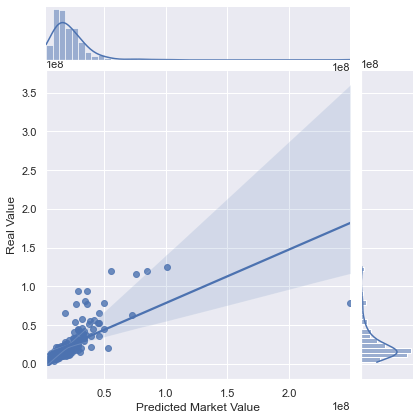

In [349]:
sns.jointplot(x=Test_Set['Predicted Market Value'],y=Test_Set['Real Value'], kind='reg')

In [350]:
# I will need it in some day 

# poly_test = make_pipeline(PolynomialFeatures(2),Lasso())
# poly_test.fit(X_train_poly_scaled,y_train)
# predicted_poly = poly_test.predict(X_test_poly_scaled)


# print('train Score: ',poly_test.score(X_train_poly_scaled,y_train))
# print('validation Score: ',poly_test.score(X_val_poly_scaled,y_val))
# print('test Score: ',poly_test.score(X_test_poly_scaled,y_test))
